In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data Preprocessing #

In [66]:
dataset = pd.read_csv("E:/Assingment/Python Project/Churn Modelling/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [68]:
input_data = dataset.iloc[:,:-1]
output_data = dataset.iloc[:,-1]

In [69]:
non_numeric_columns = input_data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [70]:
input_data = input_data.drop(columns=non_numeric_columns)

In [71]:
ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data), columns = input_data.columns)

In [72]:
input_data

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-1.731878,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-1.731531,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.731185,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,-1.730838,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,-1.730492,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,-1.177652,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,1.730838,-1.682806,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,1.731185,-1.479282,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.731531,-0.119356,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [73]:
input_data.shape

(10000, 10)

# Spliting Data into Traning and Testing #

In [74]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

In [75]:
x_test

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,0.433879,-0.047942,-0.564197,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811
4684,-0.109292,0.639799,-0.284834,0.388871,-1.387538,-1.225848,0.807737,0.646092,0.970243,0.804921
1731,-1.132242,0.428032,-0.512463,0.484225,-0.350204,-1.225848,0.807737,0.646092,-1.030670,-0.722147
4742,-0.089201,0.989724,-1.495407,1.914528,1.032908,0.683816,0.807737,0.646092,0.970243,1.227481
4521,-0.165757,-0.584472,-0.936681,-1.136786,0.687130,0.777477,-0.911583,0.646092,0.970243,0.253524
...,...,...,...,...,...,...,...,...,...,...
6412,0.489304,-1.278399,-0.502117,1.342407,-0.004426,0.349118,-0.911583,-1.547768,0.970243,-0.957298
8285,1.138131,-1.644728,-0.429689,-1.327494,1.724464,-1.225848,-0.911583,-1.547768,0.970243,0.170498
7853,0.988481,0.774801,0.822271,0.770285,0.687130,-1.225848,-0.911583,0.646092,-1.030670,-1.160142
1095,-1.352558,-0.025852,0.429093,-0.946079,-0.350204,-1.225848,-0.911583,0.646092,-1.030670,-0.405759


In [76]:
print(x_train.shape)
print(y_train.shape)

(8000, 10)
(8000,)


# Create Layer of NN and Train Model #

In [77]:
import tensorflow
from keras.layers import Dense
from keras.models import Sequential

In [78]:
ann = Sequential()
ann.add(Dense(10, input_dim = 10, activation='relu'))
ann.add(Dense(4, activation='relu'))
ann.add(Dense(2, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#ann.fit(x_train, y_train, batch_size=100, epochs=50)
ann.fit(x_train, y_train, batch_size=100, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4209 - loss: 0.7270 - val_accuracy: 0.7355 - val_loss: 0.6680
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7596 - loss: 0.6549 - val_accuracy: 0.8030 - val_loss: 0.5794
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7890 - loss: 0.5632 - val_accuracy: 0.8035 - val_loss: 0.4887
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.4889 - val_accuracy: 0.8030 - val_loss: 0.4557
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.4642 - val_accuracy: 0.8065 - val_loss: 0.4365
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7984 - loss: 0.4482 - val_accuracy: 0.8180 - val_loss: 0.4233
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8122 - loss: 0.4237 - val_accuracy: 0.8195 - val_loss: 0.4124
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8059 - loss: 0.4348 - val_accuracy: 0.8235 - val_loss:

# Writing Predictive Function #

In [80]:
prd = ann.predict(x_test)

prd_data = []
for i in prd:
    if i[0] > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [81]:
prd1 = ann.predict(x_train)

prd_data1 = []
for i in prd1:
    if i[0] > 0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step


# Calculating Accuracy #

In [82]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, prd_data)*100)
print(accuracy_score(y_train, prd_data1)*100)

# Model is not Overfitted

86.05000000000001
85.9


# visualization of overfitting #

In [92]:
ann.history.history

{}

In [86]:
train_accuracy = ann.history.history["accuracy"]
test_accuracy = ann.history.history["val_accuracy"]
#train_accuracy = ann.history.history.get("accuracy")
#test_accuracy = ann.history.history.get("val_accuracy")

KeyError: 'accuracy'

In [ ]:
print("train_accuracy: ", len(train_accuracy))
print("test_accuracy: ", len(test_accuracy))

TypeError: object of type 'NoneType' has no len()

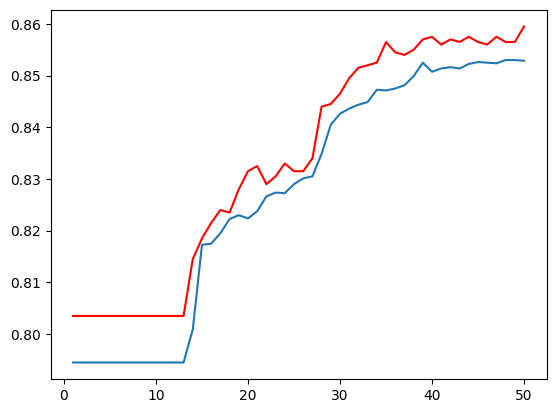

In [ ]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(1, 51)], train_accuracy)
plt.plot([i for i in range(1, 51)], test_accuracy, c='red')

# Checking Model Accuracy #

In [ ]:
input_sample = np.array([[0.433879, -0.047942, -0.564197, -0.660018, -0.695982, 
                          0.324119, 0.807737, -1.547768, -1.030670, -1.013811]], dtype=np.float32)


prd = ann.predict(input_sample)

prd_data1 = []
for i in prd:
    if i[0] > 0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)


print(prd_data1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[0]


In [ ]:
input_sample = np.array([[-0.109292, 0.639799, -0.284834, 0.388871, -1.387538, -1.225848, 0.807737, 0.646092, 0.970243, 0.804921]], dtype=np.float32)


prd = ann.predict(input_sample)

prd_data1 = []
for i in prd:
    if i[0] > 0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)


print(prd_data1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[0]


In [ ]:
input_sample = np.array([[0.489304, -1.278399, -0.502117, 1.342407, -0.004426, 0.349118, -0.911583, -1.547768, 0.970243, -0.957298]], dtype=np.float32)


prd = ann.predict(input_sample)

prd_data1 = []
for i in prd:
    if i[0] > 0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)


print(prd_data1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[0]


In [ ]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64